<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/Topic_timeline_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install plotly

In [3]:
pip install finance-datareader

     |████████████████████████████████| 48 kB 2.6 MB/s 


In [4]:
import pandas as pd
import numpy as np
import plotly.figure_factory as pff
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import FinanceDataReader as fdr
import plotly.io as pio


In [6]:
df = pd.read_excel('/content/drive/MyDrive/NLP/Topic_vis/naver_bertopic.xlsx')

In [7]:
minus_df = df[df['Topic'] == -1]
df.drop(minus_df.index, inplace=True) #해당 인덱스에 있는 값 삭제

In [8]:
first_df = df[df['Frequency'] == 1]
df.drop(first_df.index, inplace=True) #해당 인덱스에 있는 값 삭제

# Outlier 제거

In [9]:
fig = px.box(df, x='Name', y='Frequency')
fig.show()

In [10]:
q1 = df['Frequency'].quantile(0.25) 
q3 = df['Frequency'].quantile(0.75) 
iqr = q3 - q1 #변수 지정
condition = (df['Frequency'] < q1 - 1.5 * iqr) | (df['Frequency'] > q3 + 1.5 * iqr)
#25% 지점 마이너스 1.5 iqr보다 밑에 있거나, 75% 지점 플러스 1.5 iqr보다 위에 있거나(이 조건을 충족하면 이상점) 

In [11]:
df.drop(df[condition].index, inplace=True) #해당 인덱스에 있는 값 삭제

In [12]:
fig = px.box(df, x='Name', y='Frequency')
fig.show()

In [13]:
q1 = df['Frequency'].quantile(0.25) 
q3 = df['Frequency'].quantile(0.75) 
iqr = q3 - q1 #변수 지정
condition = (df['Frequency'] < q1 - 1.5 * iqr) | (df['Frequency'] > q3 + 1.5 * iqr)
#25% 지점 마이너스 1.5 iqr보다 밑에 있거나, 75% 지점 플러스 1.5 iqr보다 위에 있거나(이 조건을 충족하면 이상점) 
df.drop(df[condition].index, inplace=True) #해당 인덱스에 있는 값 삭제

In [14]:
fig = px.box(df, x='Name', y='Frequency')
fig.show()

In [15]:
fig = px.scatter(df, x="Timestamp", y="Frequency", color="Name")
fig.show()

# 군집

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime

In [17]:
data = df[['Topic', 'Frequency']]
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

model.fit(data)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53076 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49828 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54588 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49345 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49849 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51088 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

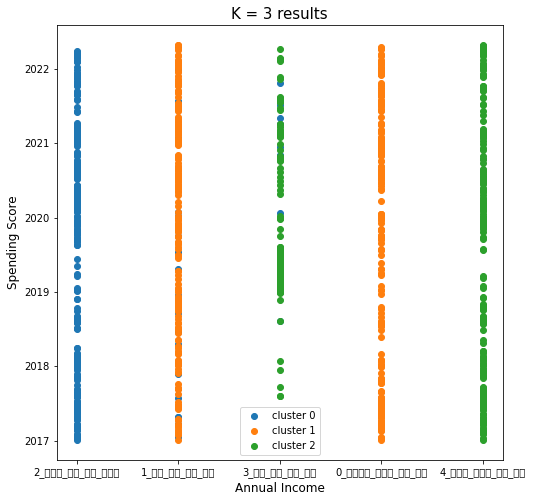

In [18]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'Name'], df.loc[df['cluster'] == i, 'Timestamp'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

## 토픽 최대값 확인

In [28]:
zero_df = df[df['Name'].str.contains('0_삼성전자_코스피_최고_사상')]
zero_four = zero_df[zero_df['Frequency'] == 4]
fig = px.scatter(zero_four, x='Timestamp', y='Frequency')
fig.show()

In [27]:
one_df = df[df['Name'].str.contains('1_투자_실적_뉴스_증권')]
one_four = one_df[one_df['Frequency'] == 4]
fig = px.scatter(one_four, x='Timestamp', y='Frequency')
fig.show()

In [33]:
one_four

,Topic,Words,Frequency,Timestamp,Name,cluster
53,1,"광고, 기우, 지속, 성장, 상승기",4,2017-01-19,1_투자_실적_뉴스_증권,0
223,1,"트래픽, 종목, 추세, 각종, 도움",4,2017-03-22,1_투자_실적_뉴스_증권,0
326,1,"자회사, 라인, 실적, 무색, 실망",4,2017-04-27,1_투자_실적_뉴스_증권,0
332,1,"라인, 목표, 우려, 종목, 하회",4,2017-04-28,1_투자_실적_뉴스_증권,0
548,1,"유지, 뉴스, 투자, 증권, 영업비",4,2017-07-28,1_투자_실적_뉴스_증권,0
813,1,"장기, 성장, 목표, 투자, 전략",4,2017-11-23,1_투자_실적_뉴스_증권,0
928,1,"유진, 전망, 투자, 매수, 성장세",4,2018-01-15,1_투자_실적_뉴스_증권,0
1122,1,"부진, 혹평, 라인, 저서, 영업비",4,2018-04-19,1_투자_실적_뉴스_증권,0
1227,1,"부진, 비용, 실적, 목표, 삼성",4,2018-06-20,1_투자_실적_뉴스_증권,0
1236,1,"핀테크, 유효, 기대감, 라인, 상승기",4,2018-06-25,1_투자_실적_뉴스_증권,0


In [29]:
two_df = df[df['Name'].str.contains('2_코스피_상승_사자_외국인')]
two_four = two_df[two_df['Frequency'] == 4]
fig = px.scatter(two_four, x='Timestamp', y='Frequency')
fig.show()

In [34]:
two_four

,Topic,Words,Frequency,Timestamp,Name,cluster
49,2,"코스피, 사자, 마감, 상승, 반복",4,2017-01-18,2_코스피_상승_사자_외국인,0
453,2,"강보합, 기관, 매수, 코스피, 시황",4,2017-06-23,2_코스피_상승_사자_외국인,0
558,2,"코스피, 기관, 회복, 상승, 매수",4,2017-08-01,2_코스피_상승_사자_외국인,0
613,2,"외국인, 사자, 코스피, 상승, 기관",4,2017-08-24,2_코스피_상승_사자_외국인,0
650,2,"상승, 외국인, 코스피, 매수, 사자",4,2017-09-07,2_코스피_상승_사자_외국인,0
696,2,"외국인, 코스피, 사자, 회복, 기관",4,2017-09-29,2_코스피_상승_사자_외국인,0
889,2,"코스피, 상승, 기관, 매수, 거래일",4,2017-12-28,2_코스피_상승_사자_외국인,0
913,2,"코스피, 외국인, 코스닥, 상승, 사자",4,2018-01-08,2_코스피_상승_사자_외국인,0
931,2,"상회, 시황, 마감, 코스피, 등정",4,2018-01-16,2_코스피_상승_사자_외국인,0
1336,2,"기관, 사자, 코스피, 개인, 마감",4,2018-08-09,2_코스피_상승_사자_외국인,0


In [30]:
three_df = df[df['Name'].str.contains('3_영업_증가_이익_전년')]
three_four = three_df[three_df['Frequency'] == 4]
fig = px.scatter(three_four, x='Timestamp', y='Frequency')
fig.show()

In [35]:
three_four

,Topic,Words,Frequency,Timestamp,Name,cluster
1346,3,"엔터, 이지, 흑자, 웍스, 긍정",4,2018-08-13,3_영업_증가_이익_전년,0
1678,3,"증가, 지난해, 영업, 녹원, 롯데제과",4,2019-01-16,3_영업_증가_이익_전년,0
1787,3,"증가, 영업, 서진, 한솔제지, 부방",4,2019-03-05,3_영업_증가_이익_전년,0
1829,3,"영업, 이익, 비피도, 시선집중, 출판",4,2019-03-21,3_영업_증가_이익_전년,0
1864,3,"비결, 영업, 케미, 한솔케미칼, 다이소",4,2019-04-04,3_영업_증가_이익_전년,0
1876,3,"증가, 지난해, 비결, 영업, 에이디",4,2019-04-09,3_영업_증가_이익_전년,0
1880,3,"비결, 증가, 영업, 아세아, 시멘트",4,2019-04-11,3_영업_증가_이익_전년,0
1888,3,"증가, 지난해, 영업, 아이튠즈, 이익",4,2019-04-15,3_영업_증가_이익_전년,0
2135,3,"영업, 증가, 예상, 이익, 카본",4,2019-07-29,3_영업_증가_이익_전년,0
2139,3,"예상, 증가, 영업, 이익, 인선",4,2019-07-30,3_영업_증가_이익_전년,0


In [31]:
four_df = df[df['Name'].str.contains('4_코스피_외국인_기관_하락')]
four_four = four_df[four_df['Frequency'] == 4]
fig = px.scatter(four_four, x='Timestamp', y='Frequency')
fig.show()

In [36]:
four_four

,Topic,Words,Frequency,Timestamp,Name,cluster
119,4,"코스피, 하락, 마감, 매도, 보합",4,2017-02-14,4_코스피_외국인_기관_하락,2
216,4,"코스피, 외인, 매도, 하락, 변심",4,2017-03-20,4_코스피_외국인_기관_하락,2
334,4,"코스피, 기관, 외국인, 팔자, 개인",4,2017-04-28,4_코스피_외국인_기관_하락,2
357,4,"순매도, 코스피, 외국인, 시황, 마감",4,2017-05-12,4_코스피_외국인_기관_하락,2
466,4,"코스피, 시황, 고가, 매도, 맴맴",4,2017-06-28,4_코스피_외국인_기관_하락,2
565,4,"낙폭, 코스피, 아래, 팔자, 기관",4,2017-08-03,4_코스피_외국인_기관_하락,2
601,4,"대외, 코스피, 매도, 나흘, 하락",4,2017-08-18,4_코스피_외국인_기관_하락,2
992,4,"코스피, 기관, 매도, 롤러코스터, 반납",4,2018-02-07,4_코스피_외국인_기관_하락,2
1129,4,"팔자, 외국인, 기관, 코스피, 하락",4,2018-04-23,4_코스피_외국인_기관_하락,2
1522,4,"하락, 코스피, 기관, 장중, 마감",4,2018-11-01,4_코스피_외국인_기관_하락,2


# 타임라인

In [37]:
df2 = [dict(Task='0_삼성전자_코스피_최고_사상', Start='2020-11-16', Finish='2021-01-21'), #
      dict(Task='1_투자_실적_뉴스_증권', Start='2021-06-16', Finish='2021-07-26'),
      dict(Task='2_코스피_상승_사자_외국인', Start='2020-07-07', Finish='2020-11-03'), #
      dict(Task='3_영업_증가_이익_전년', Start='2019-07-29', Finish='2019-08-01'),
      dict(Task='4_코스피_외국인_기관_하락', Start='2020-02-28', Finish='2020-03-23')] #
fig = pff.create_gantt(df2)
fig.show()

In [39]:
df0 = fdr.DataReader('035420', '2020-11-16', '2021-01-21') # 0번 토픽

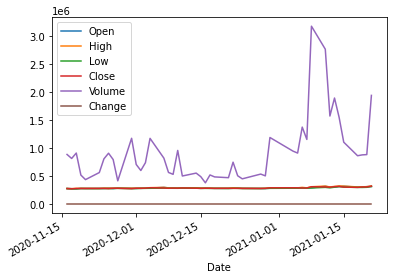

In [40]:
df0.plot()

In [42]:
df1 = fdr.DataReader('035420', '2021-06-16', '2021-07-26') # 0번 토픽

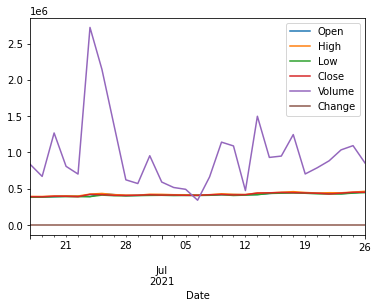

In [44]:
df1.plot()

In [51]:
df0 = fdr.DataReader('035420', '2020-11-16', '2021-01-21') # 0번 토픽

In [52]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=df0.index,y=df0['Close'], mode='lines'))
fig.show()

In [53]:
df1 = fdr.DataReader('035420', '2021-06-16', '2021-07-26') # 1번 토픽
fig = go.Figure(data=go.Scatter(x=df1.index,y=df1['Close'], mode='lines'))
fig.show()

In [54]:
df2 = fdr.DataReader('035420', '2020-07-07', '2020-11-03') # 2번 토픽
fig = go.Figure(data=go.Scatter(x=df2.index,y=df2['Close'], mode='lines'))
fig.show()

In [56]:
df3 = fdr.DataReader('035420', '2019-07-29', '2019-08-01') # 3번 토픽
fig = go.Figure(data=go.Scatter(x=df3.index,y=df3['Close'], mode='lines'))
fig.show()

In [57]:
df4 = fdr.DataReader('035420', '2020-02-28', '2020-03-23') # 4번 토픽
fig = go.Figure(data=go.Scatter(x=df4.index,y=df4['Close'], mode='lines'))
fig.show()

In [68]:
df5 = fdr.DataReader('035420', '2017-01-01', '2022-04-30') # 5년 기간
fig = go.Figure(data=go.Scatter(x=df5.index,y=df5['Close'], mode='lines'))

fig.add_trace(go.Scatter(x=df0.index, y=df0['Close'],
                    mode='lines',
                    name='0번 토픽'))

fig.add_trace(go.Scatter(x=df1.index, y=df1['Close'],
                    mode='lines',
                    name='1번 토픽'))

fig.add_trace(go.Scatter(x=df2.index, y=df2['Close'],
                    mode='lines',
                    name='2번 토픽'))

fig.add_trace(go.Scatter(x=df3.index, y=df3['Close'],
                    mode='lines',
                    name='3번 토픽'))

fig.add_trace(go.Scatter(x=df4.index, y=df4['Close'],
                    mode='lines',
                    name='4번 토픽'))
fig.show()

In [62]:
fig = go.Figure(data=go.Scatter(x=df5, y=df5['Close']))
fig.show()